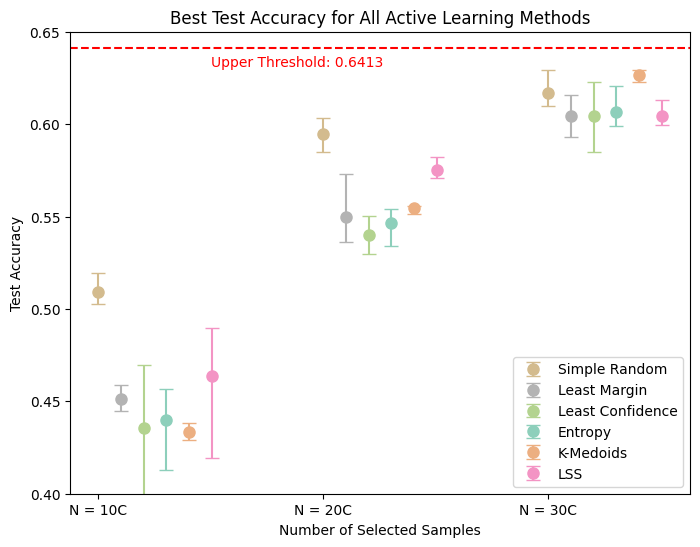

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for groups of groups
groups_of_groups = [
    # {
    #     'name': 'N = 10',
    #     'groups': [
    #         {'mean': 0.5089, 'min': 0.5027, 'max': 0.5197},
    #         {'mean': 0.4512, 'min':0.4447, 'max': 0.459}
    #     ]
    # },
    # {
    #     'name': 'N = 20',
    #     'groups': [
    #         {'mean': 0.6169, 'min': 0.6096, 'max': 0.6293},
    #         {'mean': 0.5495, 'min': 0.5362, 'max': 0.5729}
    #     ]
    # },
    #     {
    #     'name': 'N = 30',
    #     'groups': [
    #         {'mean': 0.6169, 'min': 0.6096, 'max': 0.6293},
    #         {'mean': 0.6044, 'min': 0.5851, 'max': 0.6229}
    #     ]
    # }

]

groups_of_groups = [
    {
        'name': 'Simple Random',
        'color': 'black',
        'groups': [
            {'mean': 0.5089, 'min': 0.5027, 'max': 0.5197},
            {'mean': 0.5947, 'min': 0.5851, 'max': 0.6032},
            {'mean': 0.6169, 'min': 0.6096, 'max': 0.6293}
        ]
    },
    {
        'name': 'Least Margin',
        'color': 'red',
        'groups': [
            {'mean': 0.4512, 'min': 0.4447, 'max': 0.459},
            {'mean': 0.5495, 'min': 0.5362, 'max': 0.5729},
            {'mean': 0.6046, 'min': 0.5931, 'max': 0.616}
        ]
    },
        {
        'name': 'Least Confidence',
        'color': 'orange',
        'groups': [
            {'mean': 0.4355, 'min': 0.3883, 'max': 0.4697},
            {'mean': 0.5399, 'min': 0.5298, 'max': 0.5505},
            {'mean': 0.6044, 'min': 0.5851, 'max': 0.6229}

        ]
    },
            {
        'name': 'Entropy',
        'color': 'purple',
        'groups': [
            {'mean': 0.4401, 'min': 0.4128, 'max': 0.4564},
            {'mean': 0.5466, 'min': 0.534, 'max': 0.5543},
            {'mean': 0.6065, 'min': 0.5989, 'max': 0.6207}

        ]
    },
            {
        'name': 'K-Medoids',
        'color': 'blue',
        'groups': [
            {'mean': 0.4333, 'min': 0.4293, 'max': 0.4384},
            {'mean': 0.5545, 'min': 0.5516, 'max': 0.5559},
            {'mean': 0.6266, 'min': 0.6229, 'max': 0.6293}

        ]
    },
            {
        'name': 'LSS',
        'color': 'green',
        'groups': [
            {'mean': 0.4635, 'min': 0.4191, 'max': 0.4899},
            {'mean': 0.5753, 'min': 0.5707, 'max': 0.5824},
            {'mean': 0.6043, 'min': 0.5995, 'max': 0.6128}

        ]
    }

]

# Plotting
plt.figure(figsize=(8, 6))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def create_map(num_classes=6):
    np.random.seed(4)

    colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
    pastel_colors = (colors + 1) / 2
    np.random.shuffle(pastel_colors)
    return ListedColormap(pastel_colors)

label_colormap = create_map(6)
colormap = create_map()

group_width = 0.1  # Width of each group's bars
gap = 0.001  # Gap between groups
legend_labels = {}
# Loop through groups of groups
for i, group in enumerate(groups_of_groups):
    group_positions = np.arange(len(group['groups'])) + i * (group_width + gap)  # Adjust the position for each group
    for j, subgroup in enumerate(group['groups']):
        if group['name'] not in legend_labels:
            plt.errorbar(group_positions[j], subgroup['mean'], yerr=[[subgroup['mean'] - subgroup['min']], [subgroup['max'] - subgroup['mean']]], 
                     fmt='o', capsize=5, markersize=8, color=colormap(i), label=group['name'])
            legend_labels[group['name']] = True
        else:
            plt.errorbar(group_positions[j], subgroup['mean'], yerr=[[subgroup['mean'] - subgroup['min']], [subgroup['max'] - subgroup['mean']]], 
                     fmt='o', capsize=5, markersize=8, color=colormap(i))

plt.axhline(y=0.6413, color='red', linestyle='--')

# Add a text label to the line
plt.text(0.5, 0.6313, 'Upper Threshold: 0.6413', color='red')

# Adding labels and title
plt.ylim([0.40, 0.65])
plt.xlabel('Number of Selected Samples')
plt.ylabel('Test Accuracy')
plt.title('Best Test Accuracy for All Active Learning Methods')

# Adding x-axis tick labels
#plt.xticks(np.arange(len(groups_of_groups)) + 2, [group['name'] for group in groups_of_groups])
plt.xticks([0, 1, 2], ['N = 10C', 'N = 20C', 'N = 30C'])
#plt.xticks(np.arange(len(groups_of_groups)) * (group_width + gap) + group_width / 2, [group['name'] for group in groups_of_groups])
#plt.xticks(np.arange(len(groups_of_groups)) * (group_width + gap) + (group_width + gap) / 2, [])

plt.legend()
# Show plot
#plt.grid(True)
#plt.show()
plt.savefig('Final.png', dpi=300)
